In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/n10652388/OneDrive - Queensland University of Technology/CV/Work/Github/Python/project/financial_fraud_detection_dataset.csv")


In [2]:
# Print first few rows to confirm it's loaded
print(df.head())


  transaction_id                   timestamp sender_account receiver_account  \
0        T100000  2023-08-22T09:22:43.516168      ACC877572        ACC388389   
1        T100001  2023-08-04T01:58:02.606711      ACC895667        ACC944962   
2        T100002  2023-05-12T11:39:33.742963      ACC733052        ACC377370   
3        T100003  2023-10-10T06:04:43.195112      ACC996865        ACC344098   
4        T100004  2023-09-24T08:09:02.700162      ACC584714        ACC497887   

    amount transaction_type merchant_category location device_used  is_fraud  \
0   343.78       withdrawal         utilities    Tokyo      mobile     False   
1   419.65       withdrawal            online  Toronto         atm     False   
2  2773.86          deposit             other   London         pos     False   
3  1666.22          deposit            online   Sydney         pos     False   
4    24.43         transfer         utilities  Toronto      mobile     False   

  fraud_type  time_since_last_transact

In [3]:
# Print summary statistics (count, mean, std, min, max, and quartiles) for each numerical column 
print(df.describe())

print(df.info())


             amount  time_since_last_transaction  spending_deviation_score  \
count  1.048575e+06                429548.000000              1.048575e+06   
mean   3.587525e+02                     0.654455              6.286436e-04   
std    4.703587e+02                  3576.120326              1.000978e+00   
min    1.000000e-02                 -8777.814182             -5.030000e+00   
25%    2.651000e+01                 -2563.961407             -6.700000e-01   
50%    1.381300e+02                    -0.392077              0.000000e+00   
75%    5.032000e+02                  2566.377847              6.800000e-01   
max    3.193740e+03                  8746.169245              4.850000e+00   

       velocity_score  geo_anomaly_score  
count    1.048575e+06       1.048575e+06  
mean     1.049486e+01       4.996665e-01  
std      5.769234e+00       2.885752e-01  
min      1.000000e+00       0.000000e+00  
25%      5.000000e+00       2.500000e-01  
50%      1.000000e+01       5.000000e-0

In [4]:
# drop null values
df.dropna(inplace=True)


In [5]:
# Display the names of all columns in the DataFrame
df.columns


Index(['transaction_id', 'timestamp', 'sender_account', 'receiver_account',
       'amount', 'transaction_type', 'merchant_category', 'location',
       'device_used', 'is_fraud', 'fraud_type', 'time_since_last_transaction',
       'spending_deviation_score', 'velocity_score', 'geo_anomaly_score',
       'payment_channel', 'ip_address', 'device_hash'],
      dtype='object')

In [6]:
#rename column
df.rename(columns={"merchant_category":"merchant_type"})


,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_type,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
7720,T107720,2023-02-27T09:09:10.721286,ACC391250,ACC499875,50.80,withdrawal,online,Tokyo,mobile,True,card_not_present,-4435.604463,-1.18,16,0.51,ACH,207.94.248.163,D9978939
14513,T114513,2023-03-11T04:52:42.790807,ACC853799,ACC774781,1099.03,deposit,grocery,Berlin,atm,True,card_not_present,-543.435253,0.18,8,0.47,UPI,34.66.126.237,D9225721
21111,T121111,2023-09-21T23:06:03.802962,ACC743015,ACC311170,18.73,transfer,retail,Berlin,atm,True,card_not_present,3339.160882,0.57,10,0.50,ACH,115.218.159.229,D6163373
24247,T124247,2023-03-23T18:47:07.370345,ACC693265,ACC304655,1057.66,deposit,other,Singapore,mobile,True,card_not_present,-5616.318212,-0.11,1,0.93,ACH,102.102.14.51,D1201766
24325,T124325,2023-03-01T15:29:39.072741,ACC773851,ACC321187,26.36,payment,other,Tokyo,pos,True,card_not_present,-2102.467519,-0.06,7,0.22,UPI,134.105.153.161,D6904335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048448,T1148448,2023-02-26T13:05:27.898614,ACC343726,ACC936159,793.81,deposit,retail,Toronto,mobile,True,card_not_present,-1093.109531,-0.24,16,0.26,card,146.59.143.64,D8064817
1048449,T1148449,2023-06-09T17:42:42.826042,ACC860076,ACC205218,14.03,transfer,other,Berlin,pos,True,card_not_present,3495.728092,0.66,8,0.86,card,212.225.214.54,D5693151
1048469,T1148469,2023-07-18T00:21:28.945361,ACC259960,ACC259687,146.99,payment,online,New York,mobile,True,card_not_present,-1717.544734,-0.38,14,0.19,ACH,105.129.134.65,D1473095
1048531,T1148531,2023-04-08T10:14:47.256083,ACC298078,ACC535407,26.66,payment,entertainment,Singapore,atm,True,card_not_present,-2333.911156,-0.50,9,0.92,UPI,173.151.146.49,D5627458


In [7]:
# use describe() for specific columns
df[['transaction_type','location', 'device_used']].describe()


,transaction_type,location,device_used
count,18887,18887,18887
unique,4,8,4
top,transfer,Dubai,atm
freq,4787,2430,4792


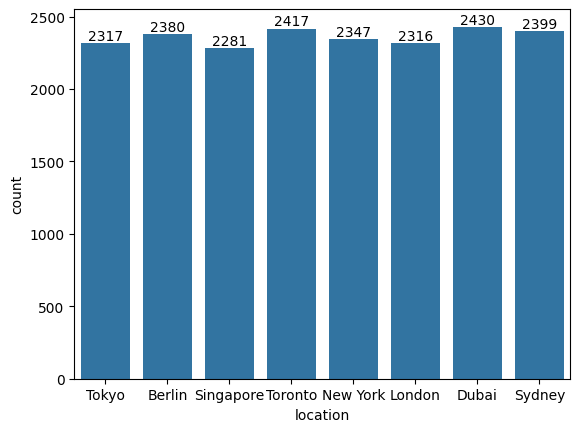

In [8]:
# plotting a bar chart for location and it's count

ax = sns.countplot(x = 'location',data = df)

for bars in ax.containers:
    ax.bar_label(bars)
    plt.show()


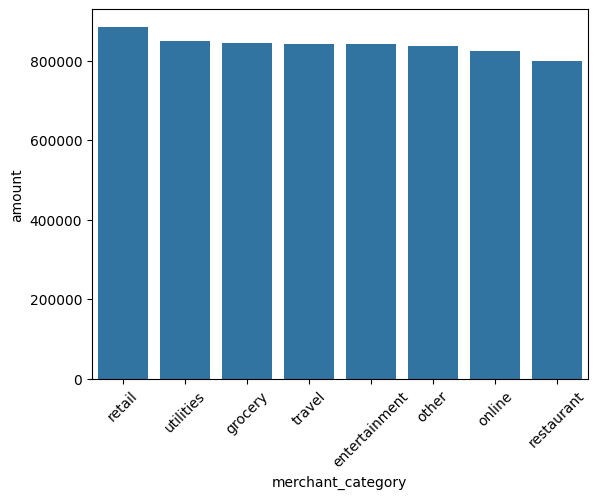

In [9]:
 # This plot reveals which merchant types have higher spending

amount_merchant_type = df.groupby(['merchant_category'], as_index=False)['amount'].sum().sort_values(by='amount', ascending=False)
sns.barplot(x = 'merchant_category',y= 'amount' ,data = amount_merchant_type)
plt.xticks(rotation=45)
plt.show()


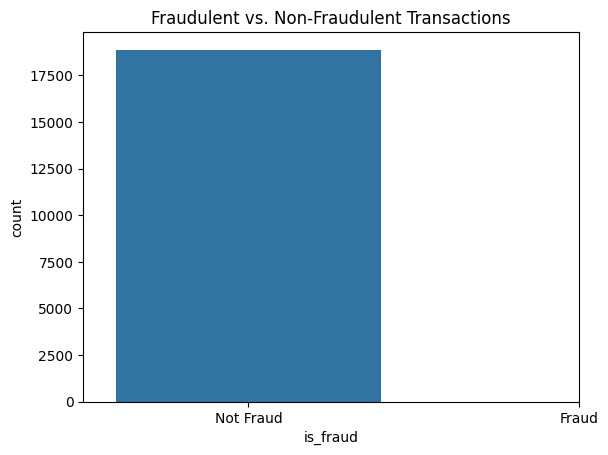

In [10]:
# Plotting the count of fraudulent vs. non-fraudulent transactions
sns.countplot(x='is_fraud', data=df)
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()


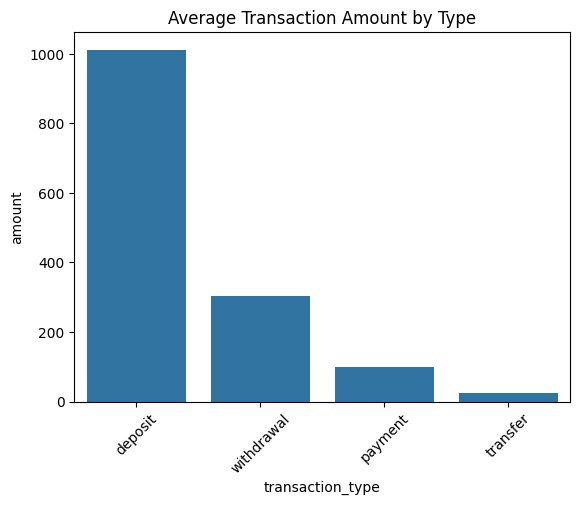

In [11]:
# Calculating and plotting the average transaction amount by transaction type
avg_amount_type = df.groupby('transaction_type')['amount'].mean().reset_index().sort_values(by='amount', ascending=False)

sns.barplot(x='transaction_type', y='amount', data=avg_amount_type)
plt.title('Average Transaction Amount by Type')
plt.xticks(rotation=45)
plt.show()


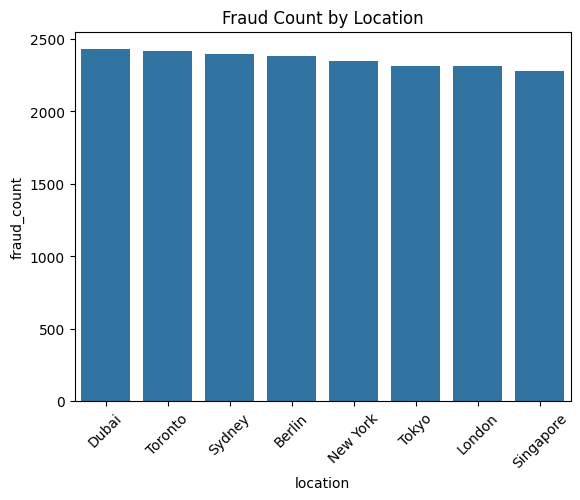

In [12]:
# Counting and plotting the number of fraud cases by location
fraud_by_location = df[df['is_fraud'] == 1].groupby('location').size().reset_index(name='fraud_count').sort_values(by='fraud_count', ascending=False)

sns.barplot(x='location', y='fraud_count', data=fraud_by_location)
plt.title('Fraud Count by Location')
plt.xticks(rotation=45)
plt.show()


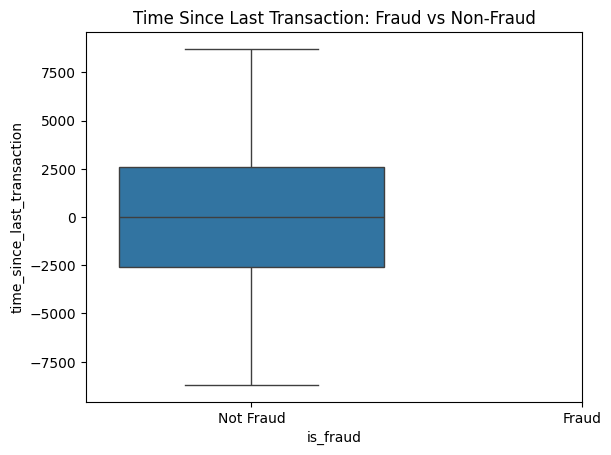

In [13]:
# Boxplot showing the distribution of time since last transaction for fraud and non-fraud cases
sns.boxplot(x='is_fraud', y='time_since_last_transaction', data=df)
plt.title('Time Since Last Transaction: Fraud vs Non-Fraud')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()


In [14]:
# Validate fraud labels
print(df['is_fraud'].value_counts(dropna=False))
print(df['is_fraud'].unique())

df = pd.read_csv(
    "C:/Users/n10652388/OneDrive - Queensland University of Technology/CV/Work/Github/Python/project/financial_fraud_detection_dataset.csv",
    converters={'is_fraud': lambda x: x == 'True'}
)


is_fraud
True    18887
Name: count, dtype: int64
[ True]


In [15]:
# Show the first few actual values in the 'is_fraud' column
print(df['is_fraud'].unique())
print(df['is_fraud'].value_counts())



[False]
is_fraud
False    1048575
Name: count, dtype: int64


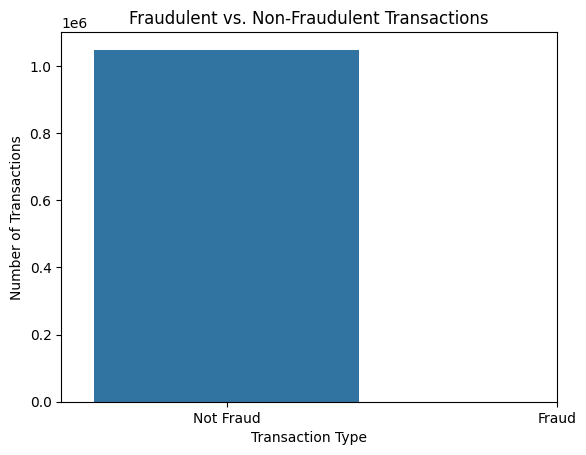

In [16]:
# Countplot of fraud vs. non-fraud
sns.countplot(x='is_fraud', data=df)
plt.title("Fraudulent vs. Non-Fraudulent Transactions")
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.ylabel("Number of Transactions")
plt.xlabel("Transaction Type")
plt.show()


In [17]:
# Hypothesis "Do transactions made using mobile devices have a different average amount than those made using ATMs?"
from scipy.stats import ttest_ind


In [18]:
# Filter data
mobile = df[df['device_used'] == 'mobile']['amount'].dropna()
atm = df[df['device_used'] == 'atm']['amount'].dropna()


In [19]:
# Perform Welch's T-test
t_stat, p_val = ttest_ind(mobile, atm, equal_var=False)


In [20]:
# Show results
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject the null hypothesis. Mobile and ATM transaction amounts differ significantly.")
else:
    print("Fail to reject the null hypothesis. No significant difference between mobile and ATM transaction amounts.")



T-statistic: 0.2202255404685219
P-value: 0.8256955921492779
Fail to reject the null hypothesis. No significant difference between mobile and ATM transaction amounts.
